About this file
This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)


In [7]:
import pandas as pd

colnames=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age','class']
df = pd.read_csv('Data/pima-indians-diabetes.csv', names=colnames)


In [8]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Informação do DataSet


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Temos 8 features (características) e uma classe (target)


Vamos separar essas features do target


In [11]:
#Remover valores duplicados do dataframe e mostrar o nome da tabela e a quantidade de linhas apagadas
df.drop_duplicates(inplace=True)
print("Tabela: ", df.shape)





Tabela:  (768, 9)


In [12]:
#Remover valores nulos do dataframe e mostrar o nome da tabela e a quantidade de linhas apagadas
df.dropna(inplace=True)
print("Tabela: ", df.shape)



Tabela:  (768, 9)


In [13]:
#Mostrar a quantidade de valores 0 em cada coluna
print((df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age','class']] == 0).sum())

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


In [14]:
# Encontra e imprime os outliers 
for col in df.columns:
    if col != 'class':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound  = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        print('Outliers de', col)
        print(df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)][col])
        print('\n')

Outliers de preg
88     15
159    17
298    14
455    14
Name: preg, dtype: int64


Outliers de plas
75     0
182    0
342    0
349    0
502    0
Name: plas, dtype: int64


Outliers de pres
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: pres, dtype: int64


Outliers de skin
579    99
Name: skin, dtype: int64


Outliers de test
8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    5

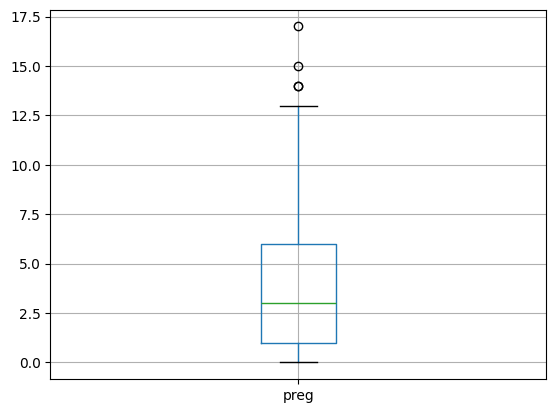

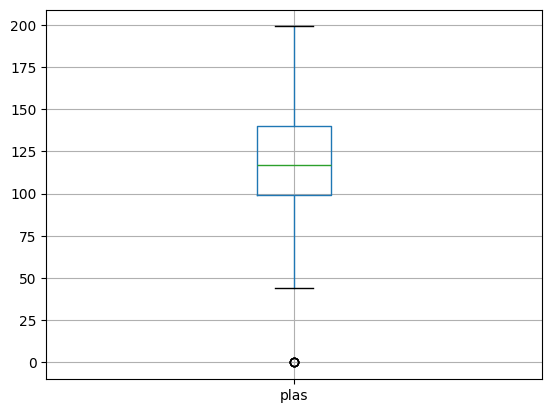

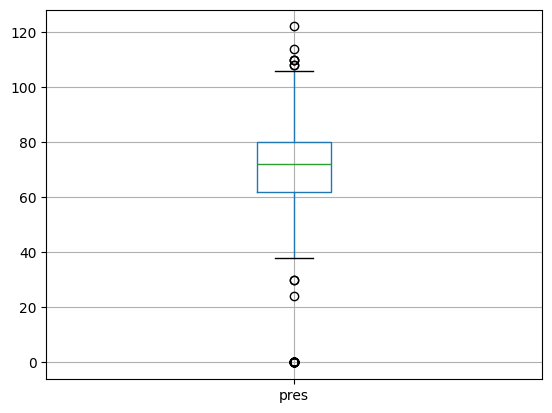

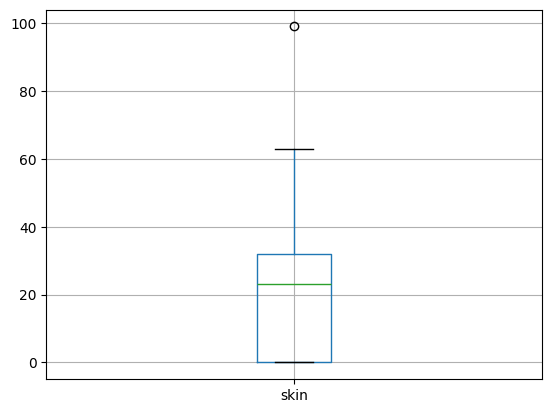

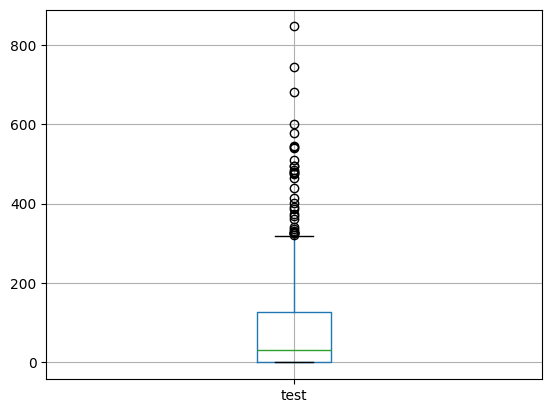

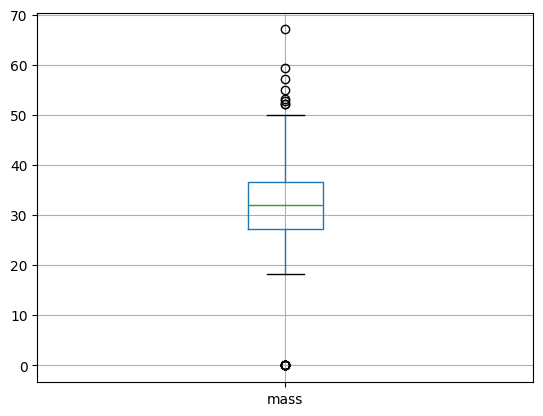

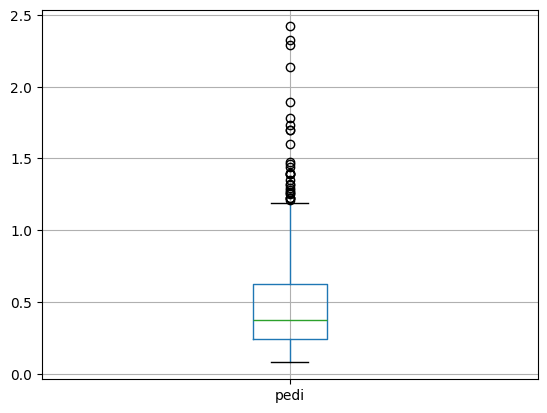

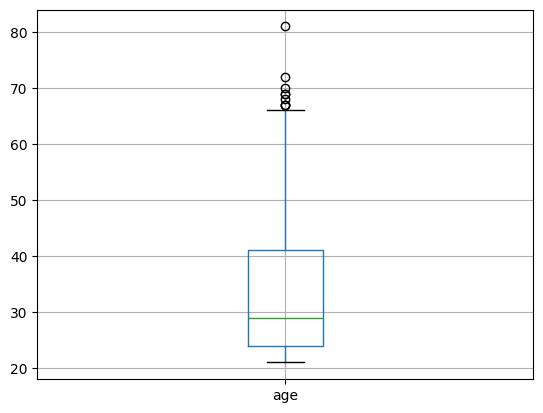

In [15]:
#Visualizar graficamente os outliers
import matplotlib.pyplot as plt

for col in df.columns:
    if col != 'class':
        df.boxplot(column=col)
        plt.show()

        

In [16]:
#Copiar todos atributos excepto a coluna class que é o target
x= df.drop('class', axis=1)

#Copiar apenas o atributo class que é o target
y= df['class']

#Vamos Selecionar as melhores features


f_classif é o melhor a selecionarmos, pois as nossas features são numéricas e o nosso alvo é categorica 

In [17]:
#f_classif é um método de seleção de features que calcula a ANOVA F-value para as features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Selecionar as 4 melhores features
bestfeatures = SelectKBest(score_func=f_classif, k=4)

In [18]:
#Aplicar a seleção de features
fit = bestfeatures.fit(x,y)

In [22]:
#Mostrar os scores das features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#Concatenar os scores com os nomes das features
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#Nomear as colunas
featureScores.columns = ['Nome','Pontuações']





In [26]:
#Mostrar as 4 melhores features
print(featureScores.nlargest(4,'Pontuações'))



   Nome  Pontuações
1  plas  213.161752
5  mass   71.772072
7   age   46.140611
0  preg   39.670227


In [25]:
#Mostrar as 4 piores features
print(featureScores.nsmallest(4,'Pontuações'))

   Nome  Pontuações
2  pres    3.256950
3  skin    4.304381
4  test   13.281108
6  pedi   23.871300
